In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
def posterior_sampler(data, prior_sampler, simulate):
    '''Yield samples from the posterior by Approximate Bayesian Computation.'''
    for p in prior_sampler:
        if simulate(p) == data:
            yield p

In [17]:
import random

def simulate_conversion(p, n_visitors):
    '''Return number of vistors who convert, given conversion fraction p.'''
    outcomes = (random.random() < p for i in range(n_visitors))
    return sum(outcomes)

In [18]:
simulate_conversion(0.02,1000)

20

In [19]:
def uniform_prior_sampler():
    '''Yield random numbers in interval (0, 1).'''
    while True:
        yield random.random()

In [20]:
import itertools

def take(n, iterable):
    "Return first n items of the iterable as a list."
    return list(itertools.islice(iterable, n))

In [21]:
n_visitors_a = 100  # number of visitors shown layout A
n_conv_a = 4        # number of vistors shown layout A who converted

n_visitors_b = 40
n_conv_b = 2

In [22]:
posterior_a_sampler = posterior_sampler(
    data=n_conv_a,
    prior_sampler=uniform_prior_sampler(),
    simulate=lambda p: simulate_conversion(p, n_visitors_a)
)

In [23]:
take(3, posterior_a_sampler)

[0.06783423041607839, 0.0579170243410283, 0.07966009670091134]

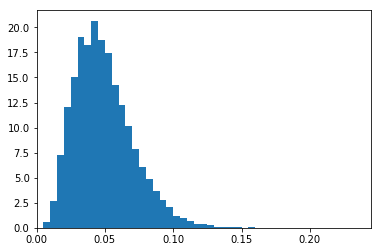

In [24]:
a_samples = take(10000, posterior_a_sampler)

abbins = [i/200.0 for i in range(50)]          # 50 bins between 0 and 0.25
plt.hist(a_samples, bins=abbins, normed=True)  # normed=True gives a probability density function
plt.xlim(0, max(abbins));

In [25]:
sum(a > 0.1 for a in a_samples)/len(a_samples)

0.021

In [26]:
def normal_prior_sampler(mu=0.06, sigma=0.02):
    '''Yield stream of samples from N(mu, sigma) in interval (0, 1).'''
    while True:
        x = random.normalvariate(mu, sigma)
        if 0 <= x <= 1:
            yield x

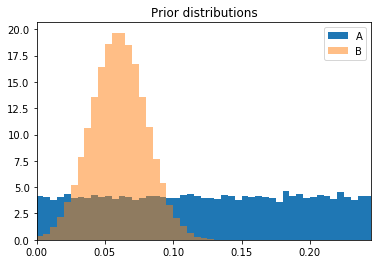

In [27]:
plt.hist(take(100000, uniform_prior_sampler()), bins=abbins, label='A', normed=True)
plt.hist(take(100000, normal_prior_sampler()), bins=abbins, label='B', alpha=0.5, normed=True)
plt.title('Prior distributions')
plt.xlim(0, max(abbins))
plt.legend();

In [28]:
posterior_b_sampler = posterior_sampler(
    data=n_conv_b,
    prior_sampler=normal_prior_sampler(),
    simulate=lambda p: simulate_conversion(p, n_visitors_b)
)
b_samples = take(10000, posterior_b_sampler)

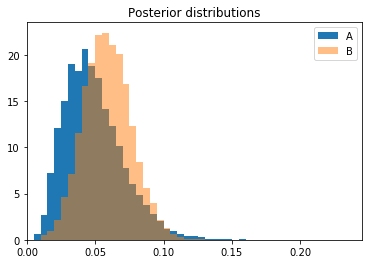

In [29]:
plt.hist(a_samples, bins=abbins, label='A', normed=True)
plt.hist(b_samples, bins=abbins, label='B', alpha=0.5, normed=True)
plt.title('Posterior distributions')
plt.xlim(0, max(abbins));
plt.legend();

In [30]:
sum(b > a for a, b in zip(a_samples, b_samples))/len(a_samples)

0.6615